## Vector-valued function with Random Fourier Features

### Imports

In [12]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [13]:
dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 500 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = np.array(np.ravel([y1, y2], 'F'))

lam = 0.000001 # Regularization parameter
y.shape

(1000,)

### Gaussian Kernel

In [14]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)
K

array([[1.        , 0.        , 0.99941699, ..., 0.        , 0.99532552,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.99719011, 0.        ,
        0.99532552],
       [0.99941699, 0.        , 1.        , ..., 0.        , 0.99222166,
        0.        ],
       ...,
       [0.        , 0.99719011, 0.        , ..., 1.        , 0.        ,
        0.99316692],
       [0.99532552, 0.        , 0.99222166, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.99532552, 0.        , ..., 0.99316692, 0.        ,
        1.        ]])

#### Alpha

In [15]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[-4.37071270e+04,  7.88860621e+04, -4.16661468e+03,
        -1.14003232e+05, -1.74068988e+05, -3.20857847e+04,
        -2.34480477e+03,  2.06952381e+04,  5.94964959e+04,
         1.06540565e+05, -3.94802023e+04,  1.99486509e+05,
         1.14881960e+05, -5.33790042e+04, -1.66154211e+04,
         1.10817298e+05,  1.24716581e+05, -6.15917349e+04,
         1.58442683e+04,  5.89295322e+04, -6.30056287e+03,
        -1.16825379e+05, -1.62450757e+05, -1.59431523e+03,
        -7.03124722e+04,  1.39439060e+05,  4.11358480e+04,
        -2.19162895e+04,  4.08225394e+04,  1.62406803e+05,
         3.87958065e+04, -2.32980329e+05,  1.16862459e+04,
         4.43145472e+04, -2.06285834e+04,  1.22393241e+05,
        -1.21669869e+04, -1.03796786e+05,  8.35708229e+03,
         9.08251941e+04, -9.34530095e+04, -1.14641296e+05,
         5.10671413e+03, -1.40374799e+05, -6.29994201e+04,
        -6.22321756e+04, -1.26532541e+05,  1.18954089e+05,
        -3.93731253e+03, -1.21202005e+05, -9.95649146e+0

#### Estimated function

In [16]:
def estimated_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estimated_function(alpha_, x_vector, n, dimension)
func

array([[1.01602987, 1.01700916, 1.03060866, 1.33785425, 1.03024143,
        0.9936861 , 1.00042157, 1.08649669, 0.99503549, 1.25391686,
        2.07028637, 1.04433087, 1.1777891 , 1.06873028, 1.02623832,
        1.13747826, 1.39405526, 1.43713296, 1.00804715, 1.02041589,
        1.10016539, 1.87989881, 1.02989321, 0.99882784, 1.00434065,
        1.39361266, 2.33523116, 1.76500416, 1.96429303, 2.67660796,
        0.99984988, 1.0531079 , 1.04415043, 1.64512142, 1.07305113,
        0.99312524, 1.09739704, 0.9922484 , 1.06874513, 1.00487709,
        1.22882093, 1.09453049, 1.06390412, 1.01530209, 0.9953236 ,
        1.24145771, 2.59759954, 1.49548112, 1.07471303, 1.57582058,
        1.94862188, 1.01144316, 1.66823127, 1.68289722, 1.21345713,
        1.89185191, 1.25628237, 1.45162764, 1.01144256, 1.49970943,
        1.38391307, 1.00463505, 1.19867837, 1.03817032, 1.14852314,
        1.02359776, 0.9928799 , 0.99405718, 1.02491476, 0.9987965 ,
        1.00577776, 1.30197005, 1.40462004, 0.99

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_26320\2062984262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_26320\2062984262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


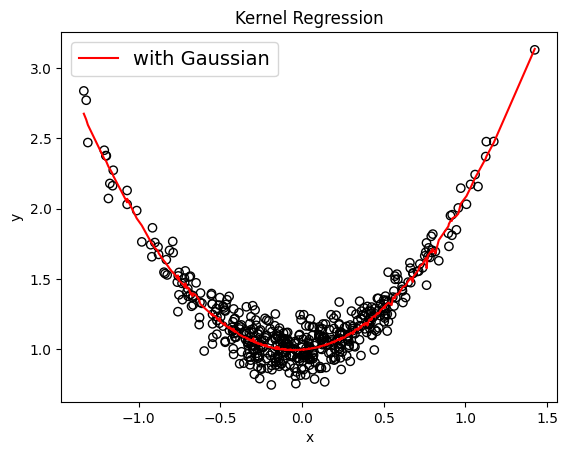

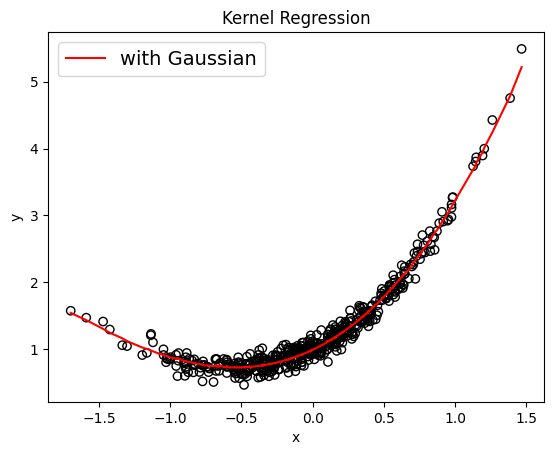

In [17]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [18]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-0.90365294, -0.        ,  0.64111804,  0.        , -1.40931092,
        -0.        ,  1.12349733,  0.        , -0.6297683 , -0.        ,
        -0.49379379, -0.        ,  1.15190244,  0.        ,  0.23340482,
         0.        ,  0.44591111,  0.        ,  1.11468967,  0.        ,
        -1.05246214, -0.        ,  1.26467318,  0.        ,  0.14457422,
         0.        , -0.62320796, -0.        , -0.53823136, -0.        ,
         1.33296664,  0.        , -1.41407222, -0.        , -1.27533791,
        -0.        , -1.17189038, -0.        ,  1.29233159,  0.        ],
       [-0.        , -0.90365294,  0.        ,  0.64111804, -0.        ,
        -1.40931092,  0.        ,  1.12349733, -0.        , -0.6297683 ,
        -0.        , -0.49379379,  0.        ,  1.15190244,  0.        ,
         0.23340482,  0.        ,  0.44591111,  0.        ,  1.11468967,
        -0.        , -1.05246214,  0.        ,  1.26467318,  0.        ,
         0.14457422, -0.        , -0.62320796, -0.

#### Phi

In [19]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[-0.87601749, -0.        ,  0.7100621 , ..., -0.        ,
         1.33527932,  0.        ],
       [-0.        , -0.87601749,  0.        , ..., -1.17240844,
         0.        ,  1.33527932],
       [-0.90365294, -0.        ,  0.64111804, ..., -0.        ,
         1.29233159,  0.        ],
       ...,
       [-0.        , -0.91114458,  0.        , ..., -1.19408714,
         0.        ,  1.2484662 ],
       [-0.81463076, -0.        ,  0.83806792, ..., -0.        ,
         1.38423387,  0.        ],
       [-0.        , -0.81463076,  0.        , ..., -1.19588979,
         0.        ,  1.38423387]])

#### Alpha

In [20]:
def alpha_approx(x_vector, y, dim, m, lam):
    phi_ = phi(x_vector, w, b, n, m, dimension)
    alpha = np.linalg.inv(phi_.T @ phi_ + lam*np.eye(dim*m)) @ (phi_.T@y)
    return alpha

alpha_approximation = alpha_approx(x_vector, y, dimension, m, lam)
alpha_approximation.shape

(40,)

#### Function Approximation

In [21]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)
function_estimate

array([[1.01701104, 1.0168619 , 1.02951745, 1.33640328, 1.02922706,
        0.99556954, 1.00083576, 1.08690505, 0.99265884, 1.25704002,
        2.069087  , 1.04559114, 1.17617091, 1.06809799, 1.02635172,
        1.13852153, 1.39533559, 1.42926507, 1.00699552, 1.02074065,
        1.1017585 , 1.87936963, 1.03211758, 0.99870083, 1.00308111,
        1.39161892, 2.33718308, 1.76794382, 1.97090006, 2.68004245,
        0.99924035, 1.0503682 , 1.04611344, 1.64213386, 1.07458486,
        0.99313312, 1.09667539, 0.99055102, 1.0670009 , 1.00418499,
        1.23521434, 1.09614871, 1.06548291, 1.01240969, 0.99428527,
        1.24024076, 2.60472714, 1.49447712, 1.07354208, 1.58167394,
        1.95373122, 1.01343949, 1.66458726, 1.68571613, 1.21533904,
        1.88854681, 1.25509298, 1.45506564, 1.01116853, 1.49923002,
        1.38292702, 1.00349427, 1.20018716, 1.03934491, 1.15143583,
        1.02063363, 0.99433914, 0.99547983, 1.02707037, 0.99999108,
        1.00652545, 1.300051  , 1.40424593, 0.99

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_26320\2458617684.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_26320\2458617684.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


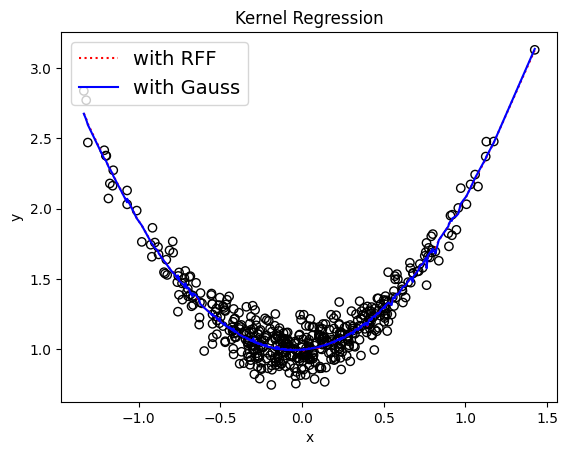

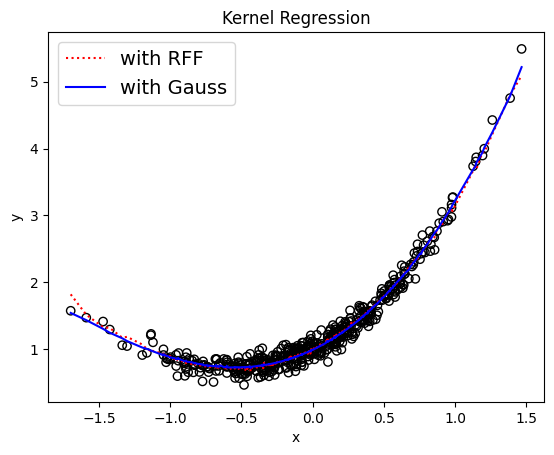

In [22]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x1), f1_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x2), f2_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()